In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
import xlrd

/Users/ksingh/miniconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/structural.py:1676: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


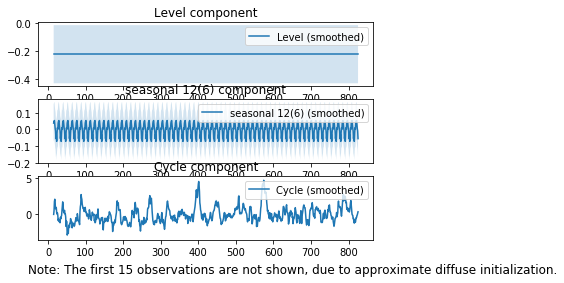

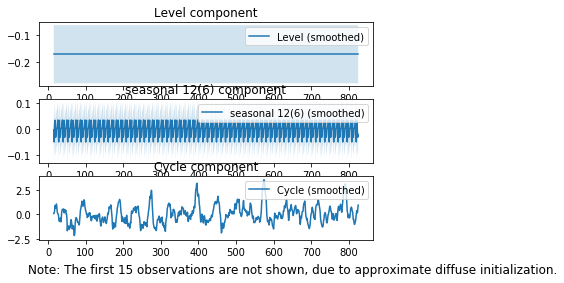

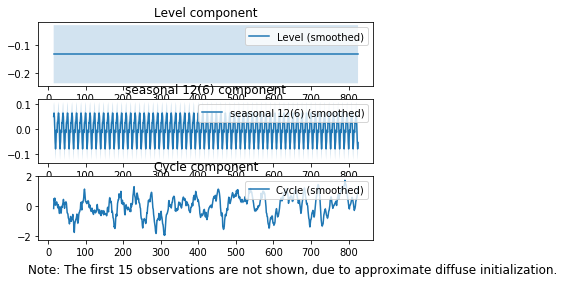

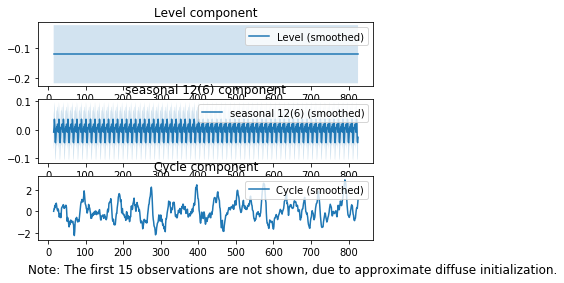

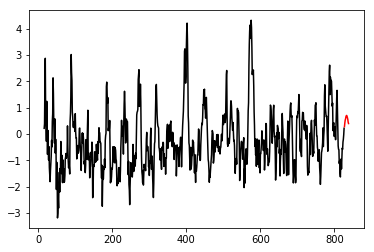

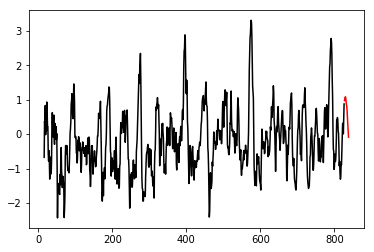

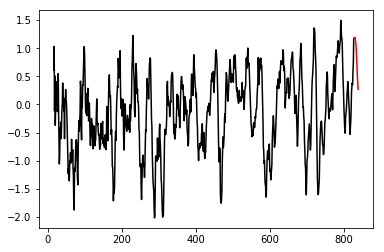

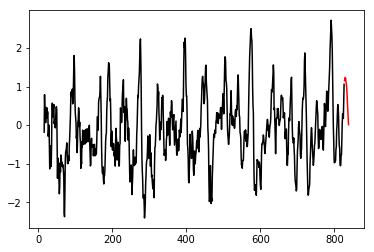

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels

# Set data folder.
folder_path ='./Nino_monthly.xlsx'
# Read Oceanic Nino Index (ONI) data.
oni = pd.read_excel(folder_path)
oni_year = pd.DataFrame(oni['YR'])
# Seperate ONI time series into different frames.
oni_nino12 = oni['ANOM_12']
oni_nino3 = oni['ANOM_3']
oni_nino4 = oni['ANOM_4']
oni_nino34 = oni['ANOM_34']
# Create the state space models.
ssm_nino12 = sm.tsa.UnobservedComponents(oni_nino12,level='fixed intercept',freq_seasonal=[{'period': 12}],cycle=True,stochastic_cycle=True)
ssm_nino3 = sm.tsa.UnobservedComponents(oni_nino3,level='fixed intercept',freq_seasonal=[{'period': 12}],cycle=True,stochastic_cycle=True)
ssm_nino4 = sm.tsa.UnobservedComponents(oni_nino4,level='fixed intercept',freq_seasonal=[{'period': 12}],cycle=True,stochastic_cycle=True)
ssm_nino34 = sm.tsa.UnobservedComponents(oni_nino34,level='fixed intercept',freq_seasonal=[{'period':12}],cycle=True,stochastic_cycle=True)
# Estimate the state space models.
ssm_fit_nino12 = ssm_nino12.fit()
ssm_fit_nino3 = ssm_nino3.fit()
ssm_fit_nino4 = ssm_nino4.fit()
ssm_fit_nino34 = ssm_nino34.fit()
# Plot the state space model components.
figure_nino12 = ssm_fit_nino12.plot_components(observed=False)
figure_nino3 = ssm_fit_nino3.plot_components(observed=False)
figure_nino4 = ssm_fit_nino4.plot_components(observed=False)
figure_nino34 = ssm_fit_nino34.plot_components(observed=False)
plt.show()
# Predict ONI for the next year.
pred_size = 12
ssm_pred_nino12 = ssm_fit_nino12.predict(1,len(oni_nino12)+pred_size)
ssm_pred_nino3 = ssm_fit_nino3.predict(1,len(oni_nino3)+pred_size)
ssm_pred_nino4 = ssm_fit_nino4.predict(1,len(oni_nino4)+pred_size)
ssm_pred_nino34 = ssm_fit_nino34.predict(1,len(oni_nino34)+pred_size)
# Plot the predictions for next year.
plt.plot(ssm_pred_nino12[15:len(ssm_pred_nino12)-pred_size],color='black')
plt.plot(ssm_pred_nino12[len(ssm_pred_nino12)-pred_size:],color='red')
plt.show()
plt.plot(ssm_pred_nino3[15:len(ssm_pred_nino12)-pred_size],color='black')
plt.plot(ssm_pred_nino3[len(ssm_pred_nino12)-pred_size:],color='red')
plt.show()
plt.plot(ssm_pred_nino4[15:len(ssm_pred_nino12)-pred_size],color='black')
plt.plot(ssm_pred_nino4[len(ssm_pred_nino12)-pred_size:],color='red')
plt.show()
plt.plot(ssm_pred_nino34[15:len(ssm_pred_nino12)-pred_size],color='black')
plt.plot(ssm_pred_nino34[len(ssm_pred_nino12)-pred_size:],color='red')
plt.show()
